In [13]:
%load_ext autoreload
%autoreload 2
#| default_exp geo_cluster


In [36]:
#| hide
#| export
from nbdev.showdoc import *
import matplotlib
import sklearn
import random 
import numpy as np
import shapely
#from libpysal.weights import Queen, KNN
from sklearn.cluster import DBSCAN, HDBSCAN, OPTICS, KMeans
import matplotlib.pyplot as plt
import sys
import os
from pyproj import CRS, Transformer
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from Cluster_ejemplo.Cluster_ejemplo import *
     

# Punto geográfico

Vamos a generar nuestros clustres ahora desde un punto de vista geográfico, y explicamos un poco como podemos transformar de un sistema de referencia a otro. 

In [3]:
from pyproj import Transformer
tr = Transformer.from_pipeline("EPSG:15851")

Tomemos las coordenadas del cuadrado que delimita al polígono que forman los municipios de la zona metrepolitana de Monterrey. En el sistema de coordenadas EPSG:4326 (latitud longitud en decimales)

* Norte 26.40
* Sur 25.23
* Este -99.68
* Oeste -100.87

Todas las coordenadas que generemos se encontraran dentro de el cuadrado que usarremos como región de interes.



In [81]:
data_rand_Monterrey= data_points(700, min_x = -100.87, min_y = 25.23, max_x= -99.68, max_y=26.40, seed = 1234)

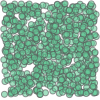

In [82]:
data_rand_Monterrey.get_Multypoint()

In [108]:
class data_geo(data_points):
    def __init__(self, n, min_x = 0, min_y = 0, max_x= 1, max_y=1, seed= None,  crs ='EPSG:4326'):
        super().__init__( n, min_x, min_y , max_x, max_y, seed)
        self.crs = CRS(crs)
        
    def transfor_crs(self, to_crs):
        """Transform points from original crs to new crs"""
        transf = Transformer.from_crs(self.crs, to_crs)
        self.Points = [shapely.Point(transf.transform(p.x, p.y)) for p in self.Points ]
        self.crs = CRS(crs)


In [109]:
data_rand_Monterrey = data_geo (500,crs ='EPSG:4326')

In [110]:
data_rand_Monterrey.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [111]:
print(data_rand_Monterrey.get_Multypoint())

MULTIPOINT ((0.4193158963199691 0.6795192803241985), (0.411950515761522 0.6346654831055594), (0.2375859056509956 0.7826382785369485), (0.9767997031247527 0.8094115303099965), (0.3439737468022506 0.3553818361438923), (0.4635435659879237 0.8243742764162544), (0.742348851678186 0.0211140991198827), (0.1646942267530495 0.8879900791062322), (0.5491893336121576 0.7504006967503761), (0.8077132545001368 0.7747875505740576), (0.2608987467134649 0.0377210397144175), (0.5317250891770139 0.4294180792931779), (0.3706633262131654 0.8899679057811993), (0.7621131658247918 0.7633011203723457), (0.7161896275776491 0.747225337065149), (0.7599890613436974 0.7545501514967995), (0.2195103900757639 0.637185764441293), (0.6720462958777367 0.5420966504929852), (0.3188428145421958 0.7835372261521425), (0.22736552243521 0.8326311889519292), (0.6659778290117826 0.3447588726024014), (0.0490585065917821 0.8736478427595012), (0.2076423994405721 0.9888257037094746), (0.3574323868617053 0.3737702736170548), (0.8978878

In [112]:
data_rand_Monterrey.Points[0].x

0.41931589631996913

In [113]:
data_rand_Monterrey.transfor_crs('6363')

In [114]:
print(data_rand_Monterrey.get_Multypoint())

MULTIPOINT ((6377518.794417935 75639.95488326666), (6377581.962195127 70647.3797493316), (6377487.51364083 87119.44137185287), (6376579.9955038875 90087.27671694489), (6377900.142930317 39559.96322981505), (6377269.506426227 91762.77534052372), (6377604.811634551 2350.214751944141), (6377344.834553702 98846.24055630695), (6377298.977265402 83528.02382127164), (6376924.392222612 86237.81456242625), (6378069.936010367 4199.043387867137), (6377685.056107929 47800.10971695924), (6377235.030441896 99064.73116376597), (6377010.619195609 84960.3125422642), (6377099.707563555 83171.93153482767), (6377026.640481149 83986.37127468587), (6377696.098879073 70929.21569589763), (6377415.73605812 60340.89948146427), (6377442.521627717 87218.90494813494), (6377413.655590731 92684.09276289659), (6377593.570276692 38375.575380059745), (6377393.226000548 97250.22898869123), (6377145.569290576 110069.3916352299), (6377878.00935259 41606.81721448423), (6377168.243903545 49335.289816632525), (6377207.644757

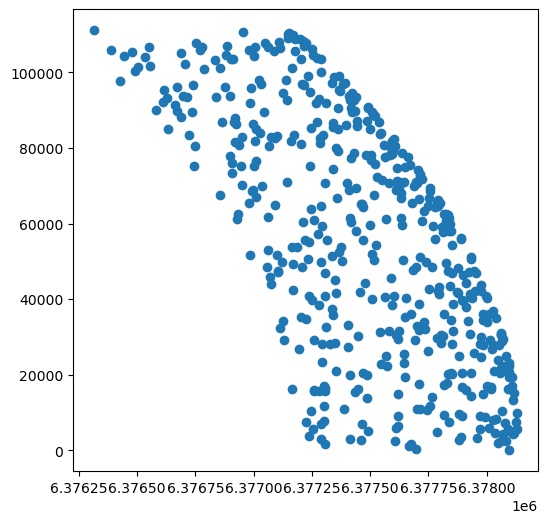

In [115]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
plt.scatter(
        data_rand_Monterrey.get_X(),
        data_rand_Monterrey.get_Y(),
    )

In [11]:

p(1,1)

(8068672.129134831, 19796828.129394975)